In [1]:
import rdkit
from rdkit.Chem import AllChem as Chem
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
with open('data/alpha.smi') as f:
    for line in f:
        if line.startswith('#') or len(line.strip()) == 0:
            continue

In [3]:
line.strip()

'OCCCc1cc2c(cc1O)CC[C@@H]1[C@@H]2CC[C@]2([C@H]1CC[C@@H]2O)C\t68712\t8.28'

In [5]:
mol = Chem.MolFromSmiles(line.split()[0])

In [6]:
mol

In [7]:
from rdkit.Chem.Fingerprints import FingerprintMols

In [8]:
paths = Chem.FindAllSubgraphsOfLengthMToN(mol,1,7,useHs=False)

In [9]:
x = Chem.MolFragmentToSmiles(mol, [0,1,6])

In [59]:
sum(paths)

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [60]:
mol.GetNumAtoms()

24

In [61]:
paths[0][-1]

(26,)

In [79]:
paths = Chem.FindAllPathsOfLengthN(mol, 7, useBonds=False)

In [80]:
len(paths)

142

In [81]:
list(paths[-1])

[23, 17, 18, 19, 20, 21, 17]

In [111]:
fp = Chem.RDKFingerprint(mol,fpSize=2048)

In [124]:
from rdkit.Chem import MACCSkeys

In [113]:
fp = Chem.GetMorganFingerprint(mol,2)

In [119]:
r = 2
fp = Chem.GetMorganFingerprintAsBitVect(mol,r,nBits=2048)


In [126]:
fp = MACCSkeys.GenMACCSKeys(mol)

In [127]:
fp.ToBitString()

'00000000000000000000000000000000000000000000000000000000000000000010000000000000001000000011000010000100110011001101101000000001110110000001000111110010110101011011110'

In [128]:
help(MACCSkeys.GenMACCSKeys)

Help on built-in function GetMACCSKeysFingerprint in module rdkit.Chem.rdMolDescriptors:

GetMACCSKeysFingerprint(...)
    GetMACCSKeysFingerprint( (Mol)mol) -> ExplicitBitVect :
        Returns the MACCS keys for a molecule as an ExplicitBitVect
    
        C++ signature :
            ExplicitBitVect* GetMACCSKeysFingerprint(RDKit::ROMol)



In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('data/alpha_rdkit_fp.gz',compression='gzip',header=None,delim_whitespace=True)

In [6]:
y = np.array(data.iloc[:,1])
x = np.array(data.iloc[:,2:],dtype=np.float)

In [7]:
x.shape

(3888, 2048)

In [8]:
from sklearn.linear_model import *

In [41]:
lars = LarsCV()

In [42]:
lasso = LassoCV()

In [49]:
lasso.fit(x,y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, normalize=False, precompute='auto',
    tol=0.0001, verbose=False)

In [54]:
np.count_nonzero(lasso.coef_)

42

In [55]:
lasso.score(x,y)

0.85141299419897465

In [58]:
p = lasso.predict(x)

In [82]:
np.count_nonzero(lasso.coef_)

42

In [85]:
lars.fit(x.astype(np.float64),y)

LarsCV(copy_X=True, cv=None, eps=2.2204460492503131e-16, fit_intercept=True,
    max_iter=500, max_n_alphas=1000, n_jobs=1, normalize=True,
    precompute='auto', verbose=False)

In [88]:
lars.score(x,y)

0.25292941222000931

In [89]:
np.count_nonzero(lars.coef_)

7

In [90]:
ll = LassoLarsCV()

In [91]:
ll.fit(x,y)

/usr/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:251: UserWarning: Regressors in active set degenerate. Dropping a regressor, after 328 iterations, i.e. alpha=2.023e-15, with an active set of 66 regressors, and the smallest cholesky pivot element being 5.960e-08
  % (n_iter, alpha, n_active, diag))
/usr/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:251: UserWarning: Regressors in active set degenerate. Dropping a regressor, after 331 iterations, i.e. alpha=1.911e-15, with an active set of 67 regressors, and the smallest cholesky pivot element being 2.581e-08
  % (n_iter, alpha, n_active, diag))
/usr/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:251: UserWarning: Regressors in active set degenerate. Dropping a regressor, after 332 iterations, i.e. alpha=1.889e-15, with an active set of 68 regressors, and the smallest cholesky pivot element being 8.025e-08
  % (n_iter, alpha, n_active, diag))
/usr/lib/python2.7/dist-packages/sklearn

LassoLarsCV(copy_X=True, cv=None, eps=2.2204460492503131e-16,
      fit_intercept=True, max_iter=500, max_n_alphas=1000, n_jobs=1,
      normalize=True, precompute='auto', verbose=False)

In [92]:
ll.score(x,y)

0.7607048705705699

In [93]:
np.count_nonzero(ll.coef_)

33

In [94]:
ll2 = LassoLarsIC()

In [95]:
ll2.fit(x,y)
ll2.score(x,y)

/usr/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:251: UserWarning: Regressors in active set degenerate. Dropping a regressor, after 488 iterations, i.e. alpha=7.982e-14, with an active set of 98 regressors, and the smallest cholesky pivot element being 9.714e-08
  % (n_iter, alpha, n_active, diag))
/usr/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:251: UserWarning: Regressors in active set degenerate. Dropping a regressor, after 488 iterations, i.e. alpha=7.976e-14, with an active set of 98 regressors, and the smallest cholesky pivot element being 9.714e-08
  % (n_iter, alpha, n_active, diag))
/usr/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:251: UserWarning: Regressors in active set degenerate. Dropping a regressor, after 488 iterations, i.e. alpha=7.966e-14, with an active set of 98 regressors, and the smallest cholesky pivot element being 1.490e-08
  % (n_iter, alpha, n_active, diag))
/usr/lib/python2.7/dist-packages/sklearn

0.0

In [96]:
np.count_nonzero(ll2.coef_)

0

In [97]:
el = ElasticNetCV()
el.fit(x,y)
el.score(x,y)

0.85899530788623402

In [98]:
np.count_nonzero(el.coef_)

80

In [14]:
from sklearn.cross_validation import KFold
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [64]:
method = Lasso()

In [118]:
kf = KFold(len(y), n_folds=4,shuffle=True)
retfit = []
retunfit = []
for train,test in kf:
    xtrain = x[train]
    ytrain = y[train]
    xtest = x[test]
    ytest = y[test]
    alphas,_,coefs = method.path(xtrain,ytrain)
    fit = []
    unfit = []
    for a in alphas:
        l = Lasso(alpha=a)
        l.fit(xtrain,ytrain)
        fit.append(l.score(xtrain,ytrain))
        unfit.append(l.score(xtest,ytest))
        print ".",
    retfit.append(fit)
    retunfit.append(unfit)
   

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


0.472379141427


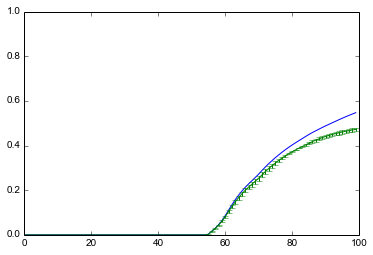

In [119]:
plt.plot(np.mean(np.array(retfit),axis=0))
unfit = np.mean(np.array(retunfit),axis=0)
unfitstd = np.std(np.array(retunfit),axis=0)
plt.errorbar(range(len(unfit)),unfit,yerr=unfitstd)
plt.ylim(0,1)
print np.max(unfit)

In [140]:
k = 5
method = LassoCV(cv=k,n_jobs=-1)
method.fit(x,y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [152]:
a = method.alpha_
kf = KFold(len(y), n_folds=k,shuffle=True)
retfit = []
retunfit = []
for train,test in kf:
    xtrain = x[train]
    ytrain = y[train]
    xtest = x[test]
    ytest = y[test]
    l = Lasso(alpha=a)
    l.fit(xtrain,ytrain)
    p1 = l.predict(xtrain)
    p2 = l.predict(xtest)
    print l.score(xtrain,ytrain),l.score(xtest,ytest),np.corrcoef(p1,ytrain)[0,1],np.corrcoef(p2,ytest)[0,1]

0.567799641502 0.478974604842 0.757449048516 0.695722735713
0.563289307768 0.512580383199 0.754802923851 0.717743364407
0.558691635222 0.526702076213 0.751769632178 0.728392811982
0.57887103581 0.441322771894 0.764813363991 0.664954702151
0.574935790462 0.475871876967 0.762467098698 0.69102794269


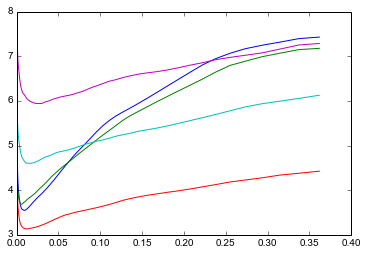

In [144]:
lassomethod = method
plt.plot(lassomethod.alphas_,lassomethod.mse_path_)

In [145]:
np.count_nonzero(lassomethod.coef_)

268

In [151]:
p = lassomethod.predict(x)
np.corrcoef(p,y)[0,1]

0.7510804587623211

In [126]:
k = 5
method = LarsCV(cv=k,n_jobs=-1)
method.fit(x,y)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/least_angle.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif Gram == 'auto':


LarsCV(copy_X=True, cv=5, eps=2.2204460492503131e-16, fit_intercept=True,
    max_iter=500, max_n_alphas=1000, n_jobs=-1, normalize=True,
    precompute='auto', verbose=False)

In [129]:
a = method.alpha_
kf = KFold(len(y), n_folds=k,shuffle=True)
retfit = []
retunfit = []
for train,test in kf:
    xtrain = x[train]
    ytrain = y[train]
    xtest = x[test]
    ytest = y[test]
    l = Lars(alpha_min=a)
    setattr(l,'alpha',a)
    l.fit(xtrain,ytrain)
    print l.score(xtrain,ytrain),l.score(xtest,ytest)

-2.87279293426 -8.24247405825
-62.6776836451 -141.852831333


KeyboardInterrupt: 

In [178]:
k = 5
method = ElasticNetCV(cv=k,n_jobs=-1)
method.fit(x,y)
a = method.alpha_
kf = KFold(len(y), n_folds=k,shuffle=True)
retfit = []
retunfit = []
for train,test in kf:
    xtrain = x[train]
    ytrain = y[train]
    xtest = x[test]
    ytest = y[test]
    l = ElasticNet(alpha=a)
    l.fit(xtrain,ytrain)
    p1 = l.predict(xtrain)
    p2 = l.predict(xtest)
    print l.score(xtrain,ytrain),l.score(xtest,ytest),np.corrcoef(p1,ytrain)[0,1],np.corrcoef(p2,ytest)[0,1]

0.579219715561 0.450032422522 0.765496988814 0.671073603417
0.558310796727 0.538533491473 0.752203595129 0.736948502565
0.566142657482 0.516377455236 0.757333813116 0.721585041476
0.568620925381 0.488285854907 0.758651182755 0.700776612757
0.570594012861 0.48570978543 0.760153534316 0.701581401665


In [137]:
elastic = method

In [139]:
np.count_nonzero(elastic.coef_)

331

In [133]:
k = 5
method = RidgeCV(cv=k)
method.fit(x,y)
a = method.alpha_
kf = KFold(len(y), n_folds=k,shuffle=True)
retfit = []
retunfit = []
for train,test in kf:
    xtrain = x[train]
    ytrain = y[train]
    xtest = x[test]
    ytest = y[test]
    l = Ridge(alpha=a)
    l.fit(xtrain,ytrain)
    print l.score(xtrain,ytrain),l.score(xtest,ytest)

0.68930683941 0.312506604324
0.701433837563 0.263044818824
0.694590008191 0.286064141321
0.694034361753 0.369425946305
0.683018600681 0.397600934827


In [135]:
np.count_nonzero(method.coef_)

2048

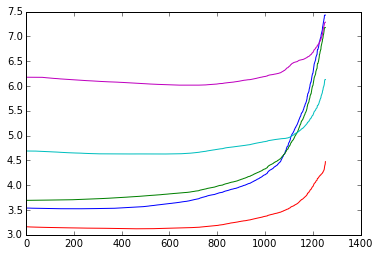

In [236]:
plt.plot(lars.cv_mse_path_)

In [237]:
np.count_nonzero(lars.coef_)

274

In [229]:
kf = KFold(len(y), n_folds=3,shuffle=True)
method = LassoLarsCV(cv=5,n_jobs=-1)
for train,test in kf:
    xtrain = x[train]
    ytrain = y[train]
    xtest = x[test]
    ytest = y[test]
    method.fit(xtrain,ytrain)
    print method.score(xtest,ytest),np.count_nonzero(method.coef_)

0.375400633361 38
0.299451002592 41
0.390510541857 17


In [26]:
from sklearn.cross_decomposition import PLSRegression

In [238]:
pls = PLSRegression(2)

In [239]:
pls.fit(x,y)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [240]:
pls.score(x,y)

0.34139537428948619

In [159]:
kf = KFold(len(y), n_folds=5,shuffle=True)
retfit = []
retunfit = []

for train,test in kf:
    xtrain = x[train]
    ytrain = y[train]
    xtest = x[test]
    ytest = y[test]
    fit = []
    unfit = []
    for i in xrange(1,51):
        pls = PLSRegression(i)
        pls.fit(xtrain,ytrain)
        p1 = pls.predict(xtrain).squeeze()
        p2 = pls.predict(xtest).squeeze()
        fit.append(np.corrcoef(p1,ytrain)[0,1])
        unfit.append(np.corrcoef(p2,ytest)[0,1])
    retfit.append(fit)
    retunfit.append(unfit)

In [165]:
p1.squeeze()

array([ 11.71689708,  -0.84355659,   9.63282471, ...,  12.24492684,
        12.24492684,  12.24492684])

11


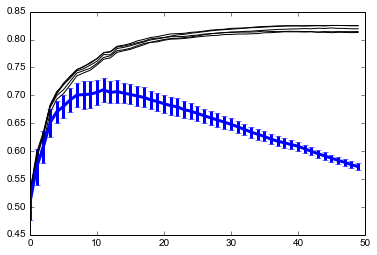

In [166]:
for fit in retfit:
    plt.plot(fit,'k-')

means = np.mean(np.array(retunfit),axis=0)
std = np.std(np.array(retunfit),axis=0)
plt.errorbar(range(0,len(retunfit[0])),means,yerr=std,linewidth=3)

print np.argmax(means)

In [168]:
p = pl

2048

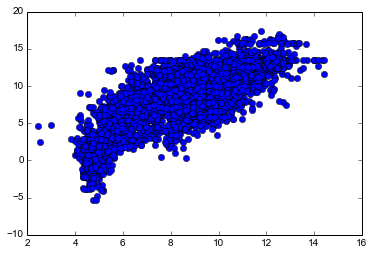

In [169]:
pls = PLSRegression(11)
pls.fit(x,y)
p = pls.predict(x)
plt.plot(y,p,'o')

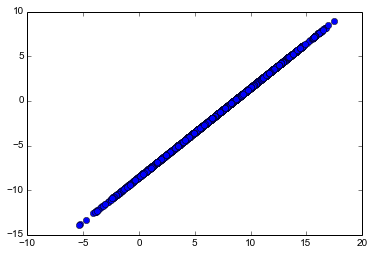

In [177]:
y2 = np.dot((x-pls.x_mean_)/pls.x_std_,pls.coef_)
plt.plot(p,y2,'o')

In [52]:
pls.score(x,y)

-0.21475481424097409

In [60]:
r2_score(p,y)

0.31481898857263901

In [61]:
help(r2_score)

Help on function r2_score in module sklearn.metrics.regression:

r2_score(y_true, y_pred, sample_weight=None)
    R^2 (coefficient of determination) regression score function.
    
    Best possible score is 1.0, lower values are worse.
    
    Parameters
    ----------
    y_true : array-like of shape = [n_samples] or [n_samples, n_outputs]
        Ground truth (correct) target values.
    
    y_pred : array-like of shape = [n_samples] or [n_samples, n_outputs]
        Estimated target values.
    
    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    z : float
        The R^2 score.
    
    Notes
    -----
    This is not a symmetric function.
    
    Unlike most other scores, R^2 score may be negative (it need not actually
    be the square of a quantity R).
    
    References
    ----------
    .. [1] `Wikipedia entry on the Coefficient of determination
            <http://en.wikipedia.org/wiki/Coefficient_of_d

In [179]:
np.mean([1,2,3])

2.0

In [245]:
ridge = RidgeCV(cv=3)

In [ ]:
ridge.fit(x,y)

In [9]:
lsq = LinearRegression()

In [10]:
lsq.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
lsq.score(x,y)

0.68654272403977235

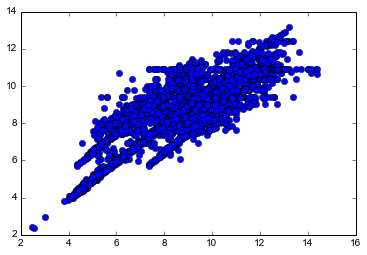

In [12]:
p = lsq.predict(x)
plt.plot(y,p,'o')

In [15]:
kf = KFold(len(y), n_folds=3,shuffle=True)

for train,test in kf:
    xtrain = x[train]
    ytrain = y[train]
    xtest = x[test]
    ytest = y[test]
    lsq = LinearRegression()
    lsq.fit(xtrain,ytrain)
    print lsq.score(xtrain,ytrain),lsq.score(xtest,ytest)

0.691532034431 -6.58953111628e+25
0.524301230043 -5.48628015664e+25
0.692814459735 -3.3967879211e+25


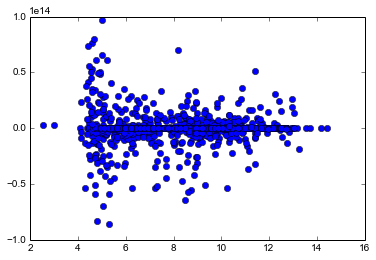

In [20]:
p = lsq.predict(xtest)
plt.plot(ytest,p,'o')